In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [19]:
data = pd.read_csv('heart_disease.csv')
print(data.head())

    age  gender   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0     1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0     1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0     1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0     1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0     0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  heart_diagnosis  
0    3.0  0.0   6.0                0  
1    2.0  3.0   3.0                2  
2    2.0  2.0   7.0                1  
3    3.0  0.0   3.0                0  
4    1.0  0.0   3.0                0  


In [20]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Impute missing values for numerical features with the mean
num_imputer = SimpleImputer(strategy='mean')
data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']] = num_imputer.fit_transform(data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']])

# Impute missing values for categorical features with the mode
cat_imputer = SimpleImputer(strategy='most_frequent')
data[['gender', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']] = cat_imputer.fit_transform(data[['gender', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']])

# Check again for missing values to confirm they are handled
missing_values_after_imputation = data.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)

Missing values in each column:
 age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 4
thal               2
heart_diagnosis    0
dtype: int64
Missing values after imputation:
 age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
heart_diagnosis    0
dtype: int64


In [21]:
# Data distribution
data.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


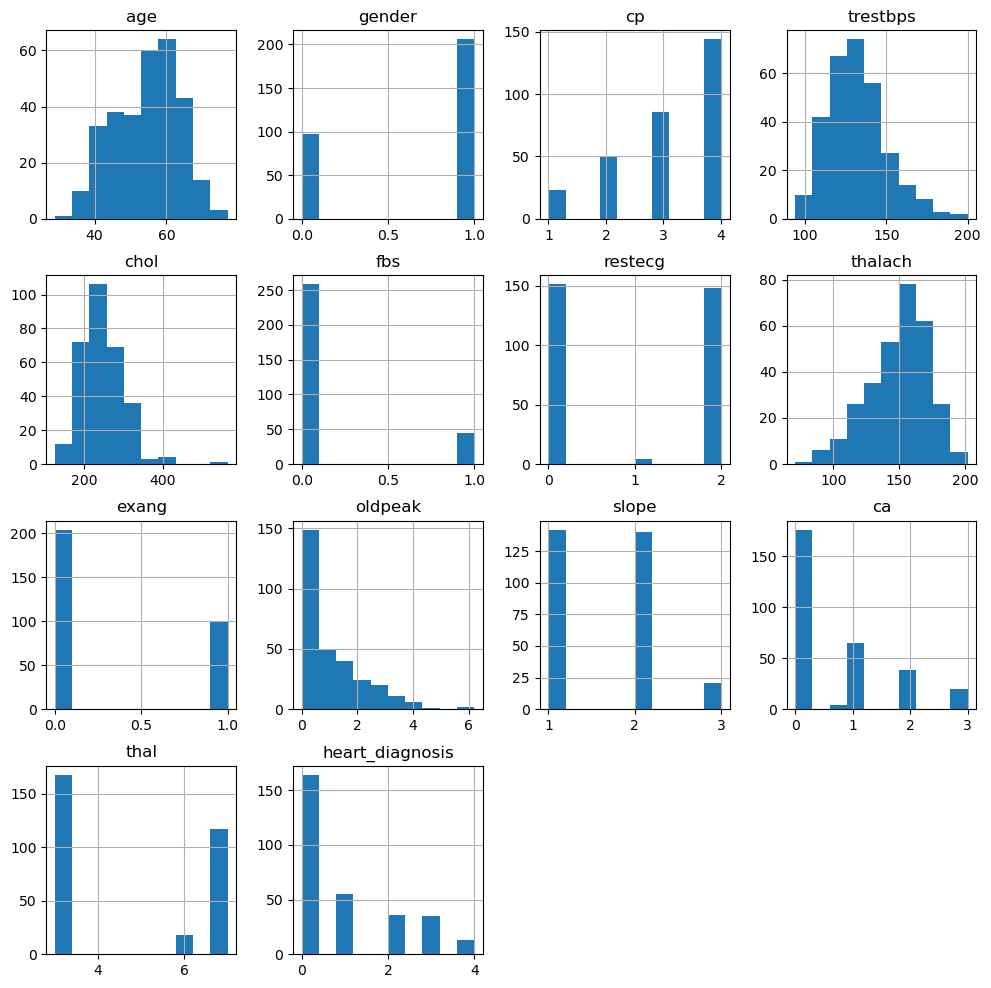

In [22]:
# Visualize distributions of numerical features
data.hist(figsize=(12, 12))
plt.show()

In [23]:
# Convert categorical variables to dummy/indicator variables
data = pd.get_dummies(data, columns=['gender', 'cp', 'restecg', 'slope', 'thal'], drop_first=True)


In [24]:
# Define the feature columns and target column
X = data.drop('heart_diagnosis', axis=1)
y = data['heart_diagnosis']

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Initialize and train the logistic regression model with increased max_iter and different solver
model = LogisticRegression(max_iter=10000, solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, solver='liblinear')

In [36]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [37]:
# Print model results
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[23  3  2  1  0]
 [ 3  0  1  7  1]
 [ 1  3  0  4  1]
 [ 0  2  0  5  0]
 [ 0  1  0  2  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         9
           3       0.26      0.71      0.38         7
           4       0.33      0.25      0.29         4

    accuracy                           0.48        61
   macro avg       0.29      0.35      0.30        61
weighted avg       0.46      0.48      0.45        61

Accuracy Score: 0.47540983606557374


In [38]:
# Get feature importance
feature_importance = np.abs(model.coef_[0])

In [39]:
# Create a dataframe for feature importance
feature_importance_df = pd.DataFrame({'Feature': data.columns.drop('heart_diagnosis'), 'Importance': feature_importance})


In [41]:
# Sort the dataframe by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance_df)

Feature Importance:
         Feature  Importance
7            ca    1.090905
8    gender_1.0    0.901714
11       cp_4.0    0.829065
14    slope_2.0    0.773414
2          chol    0.509578
17     thal_7.0    0.416759
6       oldpeak    0.342500
1      trestbps    0.273782
9        cp_2.0    0.256312
4       thalach    0.249987
5         exang    0.225787
0           age    0.188858
16     thal_6.0    0.156594
3           fbs    0.147503
15    slope_3.0    0.075392
13  restecg_2.0    0.048874
10       cp_3.0    0.005632
12  restecg_1.0    0.004787


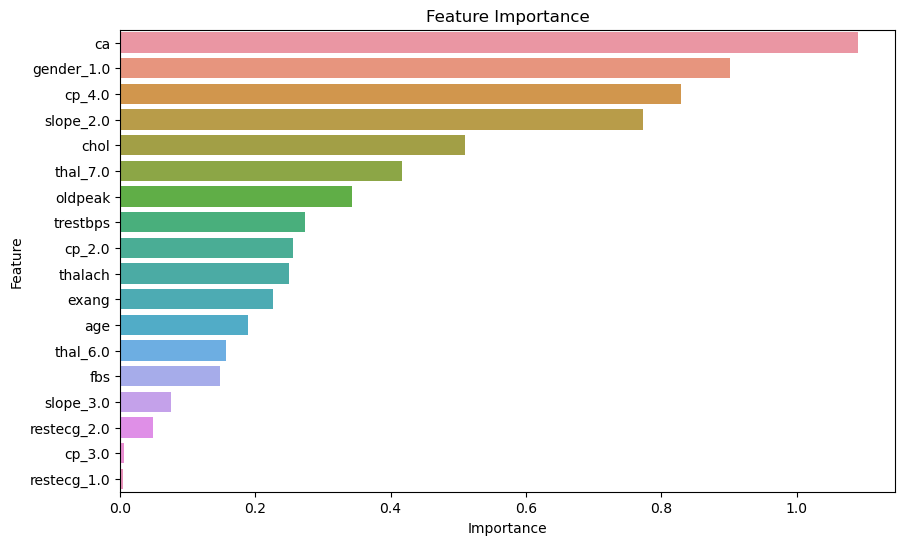

In [42]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()